# SI 618 Homework 6: Clustering

## The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Top-level Goal
Your overall goal in this assignment is to cluster airplane incidents according to the text contained in the summaries of the incidents.  This will provide an opportunity for you to apply the methods we talked about in the lecture. 

You should pick a decade (i.e. any contiguous 10-year span) of air crashes data, focus on the column called "summary" and try to cluster the air crashes based on these summaries using both hierarchical and k-means clustering.

Hint:
- Be careful with the choice of decade, some decades do not have sufficient data to play with.
- pandas.to_datetime is a useful function for transforming string-based dates to datetime objects in a dataframe.
- It's necessary to clean the data before you formally begin to answer the questions.

# Q1 (5 points) Download and describe the data
You can download the air crash dataset through this [page](https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq). Download the .csv file (Airplane_Crashes_and_Fatalities_Since_1908.csv) and explore the dataset in the same way as you explored the Pokemon dataset in this week's class.  You should use graphical and analytic methods to describe the data as completely as possible.

In [2]:
%matplotlib inline 

In [3]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from collections import Counter


In [4]:
airplane = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [5]:
airplane.Date

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
           ...    
5263    05/20/2009
5264    05/26/2009
5265    06/01/2009
5266    06/07/2009
5267    06/08/2009
Name: Date, Length: 5268, dtype: object

In [6]:
airplane.Date.str.split('/')[2]

['08', '06', '1913']

In [7]:
airplane['Date'] = pd.to_datetime(airplane['Date'])

In [8]:
airplane=airplane[(airplane.Date>='01/01/1990') & (airplane.Date<='01/01/2000')]

In [9]:
airplane

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2514,1991-02-22,NaN,"Cazombo, Angola",Fuerza Area Angolaise,NaN,NaN,Antonov AN-26,NaN,NaN,47.0,47.0,0.0,Shot down by surface-to-air missile launced by...
3908,1990-02-05,08:37,"Near Ibague, Colombia",Helicopteros Nacionales de Colombia,NaN,Bogota via Neiva - Ibague,Grumman G-159 Gulfstream I,HK-3315X,024,15.0,15.0,0.0,"Struck Mt. El Saluda at 5,000 ft., near Image,..."
3912,1990-01-02,13:40,"Java Sea, Indonesia",Pelita Air Service,NaN,Palambang and Jakarta,CASA 212 Aviocar 200,PK-PCM,217/57N,16.0,9.0,0.0,Ditched into the Java Sea after experiencing m...
3913,1990-01-13,12:56,"Near Pervouralsk, Russia",Aeroflot,NaN,Tyumen - Ufa,Tupolev TU-134A,CCCP-65951,2351703,71.0,27.0,0.0,A fire in the rear cargo hold and fire warning...
3914,1990-01-15,08:30,"Pico Blanco, Costa Rica",SANSA,032,San Jose - Palmar Sur,CASA 212 Aviocar 200,TI-SAB,163,23.0,23.0,0.0,"Crashed about 4,500 feet up on 7,250 ft. Pico ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,1999-12-22,18:38,"Great Hallingbury, United Kingdom",Korean Air,8509,"London, England - Milan, Italy",Boeing 747-2B5F,HL-7451,22480/448,4.0,4.0,0.0,Shortly after taking off the ADI comparator al...
4685,1999-12-24,NaN,"Amritsar, India / Kandahar, Afghanistan",Indian Airlines,814,Kathmandu - New Delhi,Airbus A300B2-101,VT-EDW,036,189.0,1.0,0.0,The plane was hijacked and subsequently flown ...
4686,1999-12-25,20:15,"Bejuma, Venezuela",Cubana de Aviacion,310,Havana - Valencia,Yakovlev YAK-42D,CU-T1285,4520424914068,22.0,22.0,0.0,"While on approach, after circling for 40 minut..."
4687,1999-12-25,15:02,"Near Simara, Nepal",Skyline Airways,NaN,Simara - Kathmandu,de Havilland Canada DHC-6 Twin Otter,9N-AFL,796,10.0,10.0,0.0,The aircraft crashed 5 minutes after taking of...


In [10]:
airplane.shape

(775, 13)

In [11]:
airplane.dtypes

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

In [12]:
airplane.describe()

,Aboard,Fatalities,Ground
count,774.000000,775.000000,775.000000
mean,33.293282,21.784516,0.761290
std,55.767193,38.478341,8.844394
min,1.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,12.000000,8.000000,0.000000
75%,32.750000,21.000000,0.000000
max,517.000000,349.000000,225.000000


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


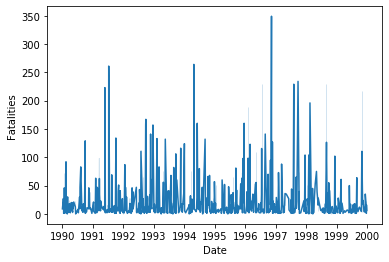

In [13]:
sns.lineplot(x='Date', y='Fatalities', data=airplane)

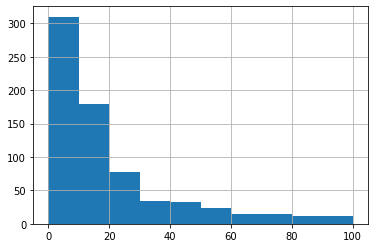

In [14]:
airplane['Aboard'].hist(bins=[0, 10, 20 ,30, 40,50,60,70,80,90,100])

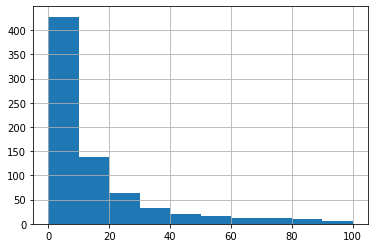

In [15]:
airplane['Fatalities'].hist(bins=[0, 10, 20 ,30, 40,50,60,70,80,90,100])

In [16]:
# airplane.Location.unique()

In [17]:
# airplane.Operator.unique()

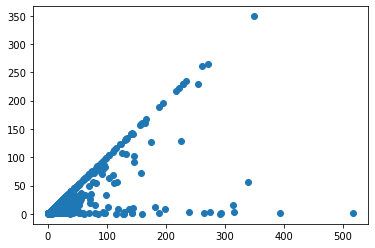

In [18]:
#colors = np.random.rand(N)
plt.scatter(airplane.Aboard,airplane.Fatalities)
plt.show()

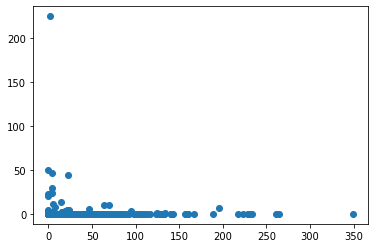

In [19]:
plt.scatter(airplane.Fatalities,airplane.Ground)
plt.show()

I firstly checked the data shape to have an overview of the data: there are 5268 rows and 13 columns in the dataframe. Then I filtered out the data between 1990 to 2000. By checking the data type, I found there are 3 numerical variables, or fload variables to be more precise: Aboard, Fatalities and Ground. All other variables are object type, though I can tell there are also Date type and categorical type. 

I try to get the unique values of location and operator, but there are too many unique values, so there's no point to list results here. By the 'describe' function, the average aboard number is 33 (higher than the total mean 27), average Fatalities is 21 (close to the total mean 20), Ground is 0.76 (lower than the average 1.6). Therefore I can assume the death rate for aboard people in airplane accident is decreasing. 

Lastly, From the histograms, 1991, 1994 and 1996 has more fatalities compared with other years. It can be seen that most Aboard and Fatalities sizes are between 10-20, mostly fall in the bin 10. From the final scatter plots, I can't see much pattern of Aborad number and Fatalities number, or Fatalities number and Ground number. 

# Q2 (10 pts): Create a roadmap to process the data
Think of how you will solve the problems in different steps.  What kind of data you need to prepare for clustering? How would you run clustering algorithms on the dataset?  Please write down your thoughts below and specify your expectations of the clustering results.

1. How the number of airplane incidents change over years? (increasing or decreasing?)
2. What's the death rate of people aboard? How that change in terms of time, operater, locations? (Fatalities/Aboard)
3. I'll choose one or multiple approaches to decide the number of cluster. 
4. How many groups of the summary from clustering, and what are the top 10 words in the accident summaries.

I will use both hierarchical clustering and K-means to visualize the clustering, and use Rule of Thumb, Elbow and Silhouette Method to decide the number of clusters. 

The results from hierarchical clustering should be very hard to read, since there are too many data point, there might be some interesting results from k-means clustering, and I will choose the clsuter who has highest silhouette. The result of Rule of Thumb usually will be bigger than the other two approaches.

# Q3 (20 pts): Text processing
With each summary, we want to transform the text into a frequency vector. For example, if we have two summaries:
- "The plane was crashed with no alarms. Checking the plane."
- "The plane was crashed on a mountain. "

After some basic text processing such as lowercases and removing stop words, you can create a frequency dataframe like this:

![Frequency Table](freq_table.png)

Please transpose the dataframe (pandas.DataFrame.transpose) and represent each summary as a frequency vector:

![Freq Table T](freq_table_t.png)

We will calculate the similarity between the summaries and run clustering algorithms based on this frequency tables.

In [20]:
from nltk.corpus import stopwords
import nltk
from collections import Counter

In [21]:
summary_token = airplane['Summary'].str.lower().dropna().apply(nltk.word_tokenize)

In [22]:
customize_words=['.',',','the','-','’']
stop_words = set(stopwords.words('english'))
new_list = stop_words.union(customize_words)

In [23]:
for token in summary_token:
    for element in token:
        if element in new_list:
            token.remove(element)
print(summary_token)

2514    [shot, surface-to-air, missile, launced, by, u...
3908    [struck, mt, el, saluda, 5,000, ft., near, ima...
3912    [ditched, java, sea, experiencing, mechanical,...
3913    [fire, rear, cargo, hold, fire, warning, both,...
3914    [crashed, 4,500, feet, on, 7,250, ft., pico, b...
                              ...                        
4684    [shortly, taking, adi, comparator, alarm, soun...
4685    [plane, hijacked, subsequently, flown, amritsa...
4686    [on, approach, after, circling, 40, minutes, 5...
4687    [aircraft, crashed, 5, minutes, taking, from, ...
4688    [on, positioning, flight, aircraft, crashed, t...
Name: Summary, Length: 761, dtype: object


In [24]:
summary_token_counter = summary_token.apply(Counter)

In [25]:
summary_table=pd.DataFrame(summary_token_counter)
summary_table

,Summary
2514,"{'shot': 1, 'surface-to-air': 1, 'missile': 1,..."
3908,"{'struck': 1, 'mt': 1, 'el': 1, 'saluda': 1, '..."
3912,"{'ditched': 1, 'java': 1, 'sea': 1, 'experienc..."
3913,"{'fire': 2, 'rear': 1, 'cargo': 1, 'hold': 1, ..."
3914,"{'crashed': 1, '4,500': 1, 'feet': 1, 'on': 1,..."
...,...
4684,"{'shortly': 2, 'taking': 1, 'adi': 1, 'compara..."
4685,"{'plane': 1, 'hijacked': 1, 'subsequently': 1,..."
4686,"{'on': 1, 'approach': 1, 'after': 1, 'circling..."
4687,"{'aircraft': 2, 'crashed': 1, '5': 1, 'minutes..."


In [26]:
summar_data_fixed = pd.DataFrame(summary_token_counter.tolist()).fillna(0)

In [28]:
indexes=[]
for i in range(0,len(summary_table)):
    indexes.append(f'summary{i+1}')

In [30]:
summar_data_fixed.index=indexes

In [110]:
pd.options.display.float_format = '{:,.0f}'.format
summar_data_fixed

,shot,surface-to-air,missile,launced,by,unita,rebels,struck,mt,el,...,crewmember,valencia,tocuyito,simon,bolivar,disrupted,simara,stating,ankara,cluster
summary1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
summary2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
summary3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
summary4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
summary5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
summary757,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
summary758,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
summary759,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,1,1,0,0,0,1
summary760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# Q4 (20 pts): Clustering
- Please run both the hierarchical clustering and k-means algorithms on the created dataframe.
- What do the results look like? Drawing the hierarachical clustering dendrogram may be helpful (or it might not -- how would you simplify an overly dense dendrogram?).
- How did you choose the number of clusters? For k-means clustering, please use the four methods mentioned in our lecture to choose an appropriate number of clusters.

In [32]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [33]:
h_model = AgglomerativeClustering(n_clusters=2)
h_model = h_model.fit(summar_data_fixed)
summar_data_fixed['cluster'] = h_model.labels_

In [34]:
summar_data_fixed.shape

(761, 3821)

In [35]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


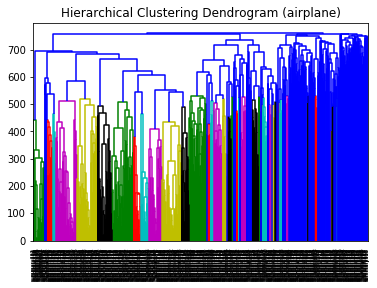

In [36]:
plt.title('Hierarchical Clustering Dendrogram (airplane)')
plot_dendrogram(h_model,labels=summar_data_fixed.index.values)
plt.xticks(rotation=90)
# plt.savefig('musicprefs.pdf',format='pdf')
plt.show()

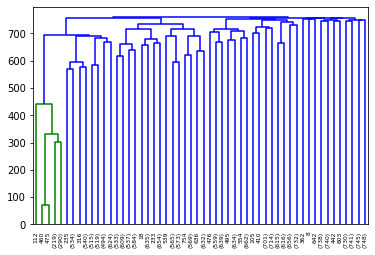

In [37]:
plot_dendrogram(h_model, truncate_mode='level', p=5)

It's pretty obvious drawing the hierarachical clustering dendrogram doesn't help much. The left part is more visuable but the right part is just a mess. I run the above code to define levels to show, and it's more clear.

In [38]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

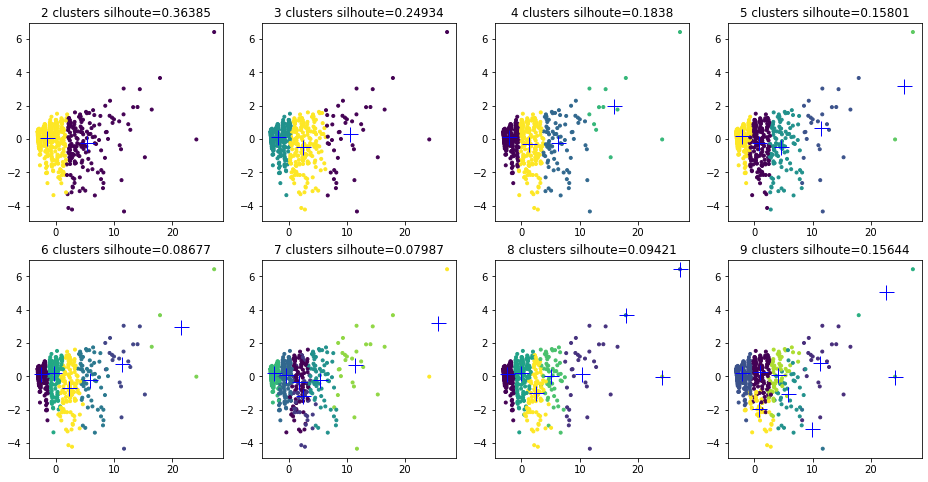

In [39]:
pca = PCA(n_components=2).fit(summar_data_fixed)
data2d = pca.transform(summar_data_fixed)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(summar_data_fixed)
    scores.append(kmean.score(summar_data_fixed))
    n_clusters.append(i)
    pred = kmean.predict(summar_data_fixed)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(summar_data_fixed, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

#Educated guessing：
From the plotting, I really think there's no point for more than 2 clusters. Most points are highly similar, and densed together, with a few scattered at right side. there's no clear boundries between the clusters. 

In [40]:
np.sqrt(len(summar_data_fixed)/2)

19.50640920313116

In [41]:
from sklearn import metrics

cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(summar_data_fixed)
    cost.append(k_means.inertia_)


(1, 15.65)

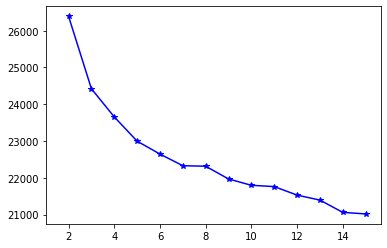

In [42]:
fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

I might choose 3 clusters based on elbow method.

(1, 15.65)

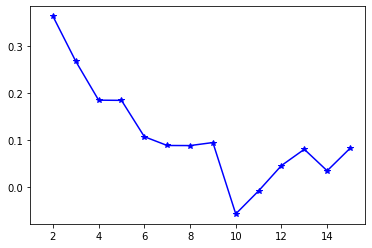

In [43]:
cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(summar_data_fixed)
    cost.append(metrics.silhouette_score(summar_data_fixed, k_means.labels_))

# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])

I might choose 2 clusters based on Silhouette method.

# Q5 (20 pts): Explain your clustering results
- How can you explain your clustering results? What kind of summaries are included in each cluster?
- Could you select some representative examples for each cluster?
- Word cloud, which has been used in the last assignment, may be helpful for understanding the clustering results

1. Hierarchical Clustering results:
I can feel the points in most clusters have similar distance to each other, meaning they are not very different. 

2. K-means Clustering results:
From the visulization, like I mentioned above, it seems majority of points are in 1 clsuter, with very few scattered far away.


In [44]:
most_common_list=[]
for token in summary_token:
    for element in token:
        if element not in new_list:
            most_common_list.append(element)
Counter(most_common_list).most_common(20)

[('crashed', 507),
 ('aircraft', 449),
 ('plane', 338),
 ('pilot', 239),
 ('flight', 216),
 ('failure', 210),
 ('engine', 198),
 ('runway', 195),
 ('approach', 182),
 ('crew', 181),
 ("'s", 164),
 ('landing', 139),
 ('altitude', 112),
 ('takeoff', 111),
 ('airport', 107),
 ('weather', 105),
 ('taking', 102),
 ('cargo', 97),
 ('control', 97),
 ('accident', 96)]

In [111]:
cluster_result_table = summar_data_fixed.groupby('cluster').describe().stack()
cluster_result_table

shot  surface-to-air  missile  launced  by  unita  rebels  \
cluster                                                                    
0       count   205             205      205      205 205    205     205   
        mean      0               0        0        0   0      0       0   
        std       0               0        0        0   0      0       0   
        min       0               0        0        0   0      0       0   
        25%       0               0        0        0   0      0       0   
        50%       0               0        0        0   0      0       0   
        75%       0               0        0        0   0      0       0   
        max       0               0        1        0   2      0       0   
1       count   556             556      556      556 556    556     556   
        mean      0               0        0        0   0      0       0   
        std       0               0        0        0   0      0       0   
        min       0               0        0        0   0      0       0   
        25%       0               0        0        0   0      0       0   
        50%       0               0        0        0   0      0       0   
        75%       0               0        0        0   0      0       0   
        max       1               1        1        1   1      1       1   

               struck  mt  el  ...  lasted  crewmember  valencia  tocuyito  \
cluster                        ...                                           
0       count     205 205 205  ...     205         205       205       205   
        mean        0   0   0  ...       0           0         0         0   
        std         0   0   0  ...       0           0         0         0   
        min         0   0   0  ...       0           0         0         0   
        25%         0   0   0  ...       0           0         0         0   
        50%         0   0   0  ...       0           0         0         0   
        75%         0   0   0  ...       0           0         0         0   
        max         2   1   1  ...       0           0         0         0   
1       count     556 556 556  ...     556         556       556       556   
        mean        0   0   0  ...       0           0         0         0   
        std         0   0   0  ...       0           0         0         0   
        min         0   0   0  ...       0           0         0         0   
        25%         0   0   0  ...       0           0         0         0   
        50%         0   0   0  ...       0           0         0         0   
        75%         0   0   0  ...       0           0         0         0   
        max         2   1   2  ...       1           1         2         1   

               simon  bolivar  disrupted  simara  stating  ankara  
cluster                                                            
0       count    205      205        205     205      205     205  
        mean       0        0          0       0        0       0  
        std        0        0          0       0        0       0  
        min        0        0          0       0        0       0  
        25%        0        0          0       0        0       0  
        50%        0        0          0       0        0       0  
        75%        0        0          0       0        0       0  
        max        0        0          0       0        0       0  
1       count    556      556        556     556      556     556  
        mean       0        0          0       0        0       0  
        std        0        0          0       0        0       0  
        min        0        0          0       0        0       0  
        25%        0        0          0       0        0       0  
        50%        0        0          0       0        0       0  
        75%        0        0          0       0        0       0  
        max        1        1          1       1        1       1  

[16 rows x 3820 

I firstly try to find the overal 10 most common words appearing in the accident summaries, and I can assume most accident involve engine, weather and losing control of the plane. Then I group by the clusters to find how different each group to each other. Cluster0 has a smaller (less than half) size than Cluster1. I try to check what words are more common in each group to identify their difference, but there are too many words and it's not a good idea to check column by column. 

In [83]:
cluster0_df = summar_data_fixed[summar_data_fixed['cluster']==0]
cluster1_df = summar_data_fixed[summar_data_fixed['cluster']==1]

column_list = list(summar_data_fixed.columns)

cluster0_summary = cluster0_df.sum()
cluster0_summary = cluster0_summary[cluster0_summary!=0]

cluster1_summary = cluster1_df.sum()
cluster1_summary = cluster1_summary[cluster1_summary!=0]

In [87]:
indexes_0 = list(cluster0_summary.index)
values_0 = list(cluster0_summary.values.astype(int))
container0 = [[indexes_0[v]]*values_0[v] for v in range(len(values_0))]
cluster0_list = [item for sublist in container0 for item in sublist]

In [93]:
cluster0_str=' '.join([str(elem) for elem in cluster0_list]) 

In [60]:
indexes_1 = list(cluster1_summary.index)
values_1 = list(cluster1_summary.values.astype(int))
container1 = [[indexes_1[v]]*values_1[v] for v in range(len(values_1))]
cluster1_list = [item for sublist in container1 for item in sublist]

In [96]:
cluster1_str=' '.join([str(elem) for elem in cluster1_list]) 

In [52]:
import os
from os import path
from wordcloud import WordCloud

In [53]:
cluster0=summar_data_fixed[summar_data_fixed['cluster']==0]

In [106]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# get the cluster text
text0 = cluster0_str
text1 = cluster1_str

# Generate a word cloud image
wordcloud0 = WordCloud(collocations = False).generate(text0)
wordcloud1 = WordCloud(collocations = False).generate(text1)

(-0.5, 399.5, 199.5, -0.5)

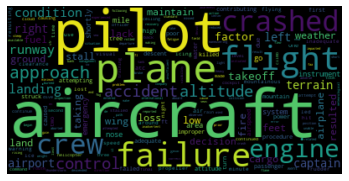

In [112]:
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

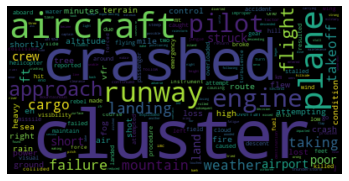

In [113]:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

So I decided to compare the cluster based on wordcloud. Cluster0's top words are pilot, plane, aircraft, failure, engine and crew, and I can guess the summary of those accidents are focusing on reporting the hardware performance/issue and how the pilot/crew behave when the accident happening. Cluster1's top words are cluster, crashed, runway, aircraft, pilot and plane, and it seems it less emphasize the pilots and more focusing on describing the accident by using crashed, and the accident in this group is more likely have relations with runway. It also focuses on reporting the hardware performance/issue, but I'm not sure what's the top word 'cluster' might be about. 

# Q5 (5 pts): Reflect on your thoughts
When you completes the clustering, please look back to your original plan for the clustering. 
- Within your plan, which steps are actually taken eventually? Which are not?  What modifications did you make to your planned process?
- Are the clustering results different from your expectations? Did you find anything unexpected or surprising?

I answered most of my questions in my plan except "What's the death rate of people aboard? How that change in terms of time, operater, locations? (Fatalities/Aboard)". But the steps for clustering was went as planed. Originally, I set the cluster to 3, and after Silhouette method, I decide to modify my model to 2 clusters. 

Honestly, I don't have many expectations for the clustering results. There are over 3000 words, it's hard to assume the features in different clusters. I did assume the overall frequent words could be 'airplane', 'crashed' and 'control'. The results are fine, there are some parts overlapped of the 2 clusters like 'plane' and 'aircraft', but one cluster mentions 'pilot' more and another mentions 'cluster' and 'crashed' more. I can only make assumtions about what the accident summary about based on those few words. I guess the only unexpected result for me is the 2 clusters are not completely disassociate with each other, maybe it's because the summary data in my table doesn't have that much difference. Airplane accident summary could be very standarised writing, and maybe dataset about novel or news will have very seperate clusters.